# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import numpy as np
import ctypes
from numpy.ctypeslib import ndpointer

## CTYPES

In [2]:
lib_path_linux = "../lib/library.so"
lib_path_windows = "../lib/library.dll"

#loading lib according to os used
if(sys.platform == "linux"):
    _lib = ctypes.cdll.LoadLibrary(lib_path_linux)
if(sys.platform == "win32"):
    _lib = ctypes.cdll.LoadLibrary(lib_path_windows)

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

#### Création du modèle

In [3]:
X = np.array([
      [1., 1.],
      [2., 3.],
      [3., 3.]
])
Y = np.array([
      1.,
      -1.,
      -1.
])
model_size = 2
_lib.create_linear_model.argtypes = [ctypes.c_int]
_lib.create_linear_model.restype = ndpointer(dtype=ctypes.c_double, shape=(model_size,))

argtypes = [
    ndpointer(dtype=ctypes.c_double, shape=(model_size,)), 
    ndpointer(dtype=ctypes.c_double, shape=(model_size,))
    ]

_lib.predict_linear_classification.argtypes = argtypes
_lib.predict_linear_classification.restype = ctypes.c_short

model = _lib.create_linear_model(model_size)
print(model)
print(_lib.predict_linear_classification(model, np.array([5.,3.])))


[0.75678685 0.4695563 ]
1


#### Entraînement

In [4]:
inputs_for_train = np.reshape(X, -1, order='F')
print(inputs_for_train)
argtypes = [
    ndpointer(dtype=ctypes.c_double, shape=(model_size,)), 
    ndpointer(dtype=ctypes.c_double, shape=inputs_for_train.shape),
    ndpointer(dtype=ctypes.c_double, shape=Y.shape),
    ctypes.c_int,
    ctypes.c_float
    ]
_lib.train_rosenblatt_linear_model.argtypes = argtypes
_lib.train_rosenblatt_linear_model.restype = ndpointer(dtype=ctypes.c_double, shape=(model_size,))

model = _lib.train_rosenblatt_linear_model(model, inputs_for_train, Y, 20, 0.01)

print(model)
for inputs in X:
    print(inputs)
    print(_lib.predict_linear_classification(model, np.array(inputs)))

[1. 2. 3. 1. 3. 3.]
[0.77678685 0.4895563 ]
[1. 1.]
1
[2. 3.]
-1
[3. 3.]
-1


#### Représentation modèle

In [5]:
predict_x1 = np.arange(1, 3, 0.01)
predict_x2 = np.arange(1, 3, 0.01)
px_1 = []
px_2 = []
predicted_color = []
for x1 in predict_x1:
  for x2 in predict_x2:
    px_1.append(x1)
    px_2.append(x2)
    predicted_color.append('lightblue' if _lib.predict_linear_classification(model, np.array([x1, x2])) >= 0 else 'lightpink')

In [ ]:
plt.scatter(px_1, px_2, c=predicted_color)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [ ]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

In [ ]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [ ]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

In [ ]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [3]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

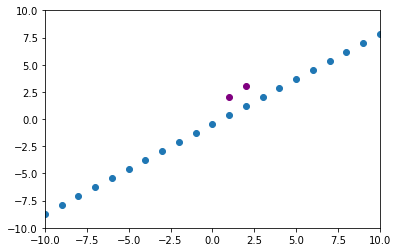

<Figure size 432x288 with 0 Axes>

In [11]:
model_size = 1
_lib.create_linear_model.argtypes = [ctypes.c_int]
_lib.create_linear_model.restype = ndpointer(dtype=ctypes.c_double, shape=(model_size,))

model = _lib.create_linear_model(model_size)
argtypes = [
    ndpointer(dtype=ctypes.c_double, shape=(model_size,)), 
    ndpointer(dtype=ctypes.c_double, shape=(model_size,))
    ]
_lib.predict_linear_model_regression.argtypes = argtypes
_lib.predict_linear_model_regression.restype = ctypes.c_double
points_x = []
points_y = []
plt.axis([-10, 10, -10, 10])
for i in range(-10, 11):
    points_x.append(i)
    points_y.append(_lib.predict_linear_model_regression(model, np.array([i + 0.0])))

plt.scatter(X,Y, c="purple")
plt.scatter(points_x, points_y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()